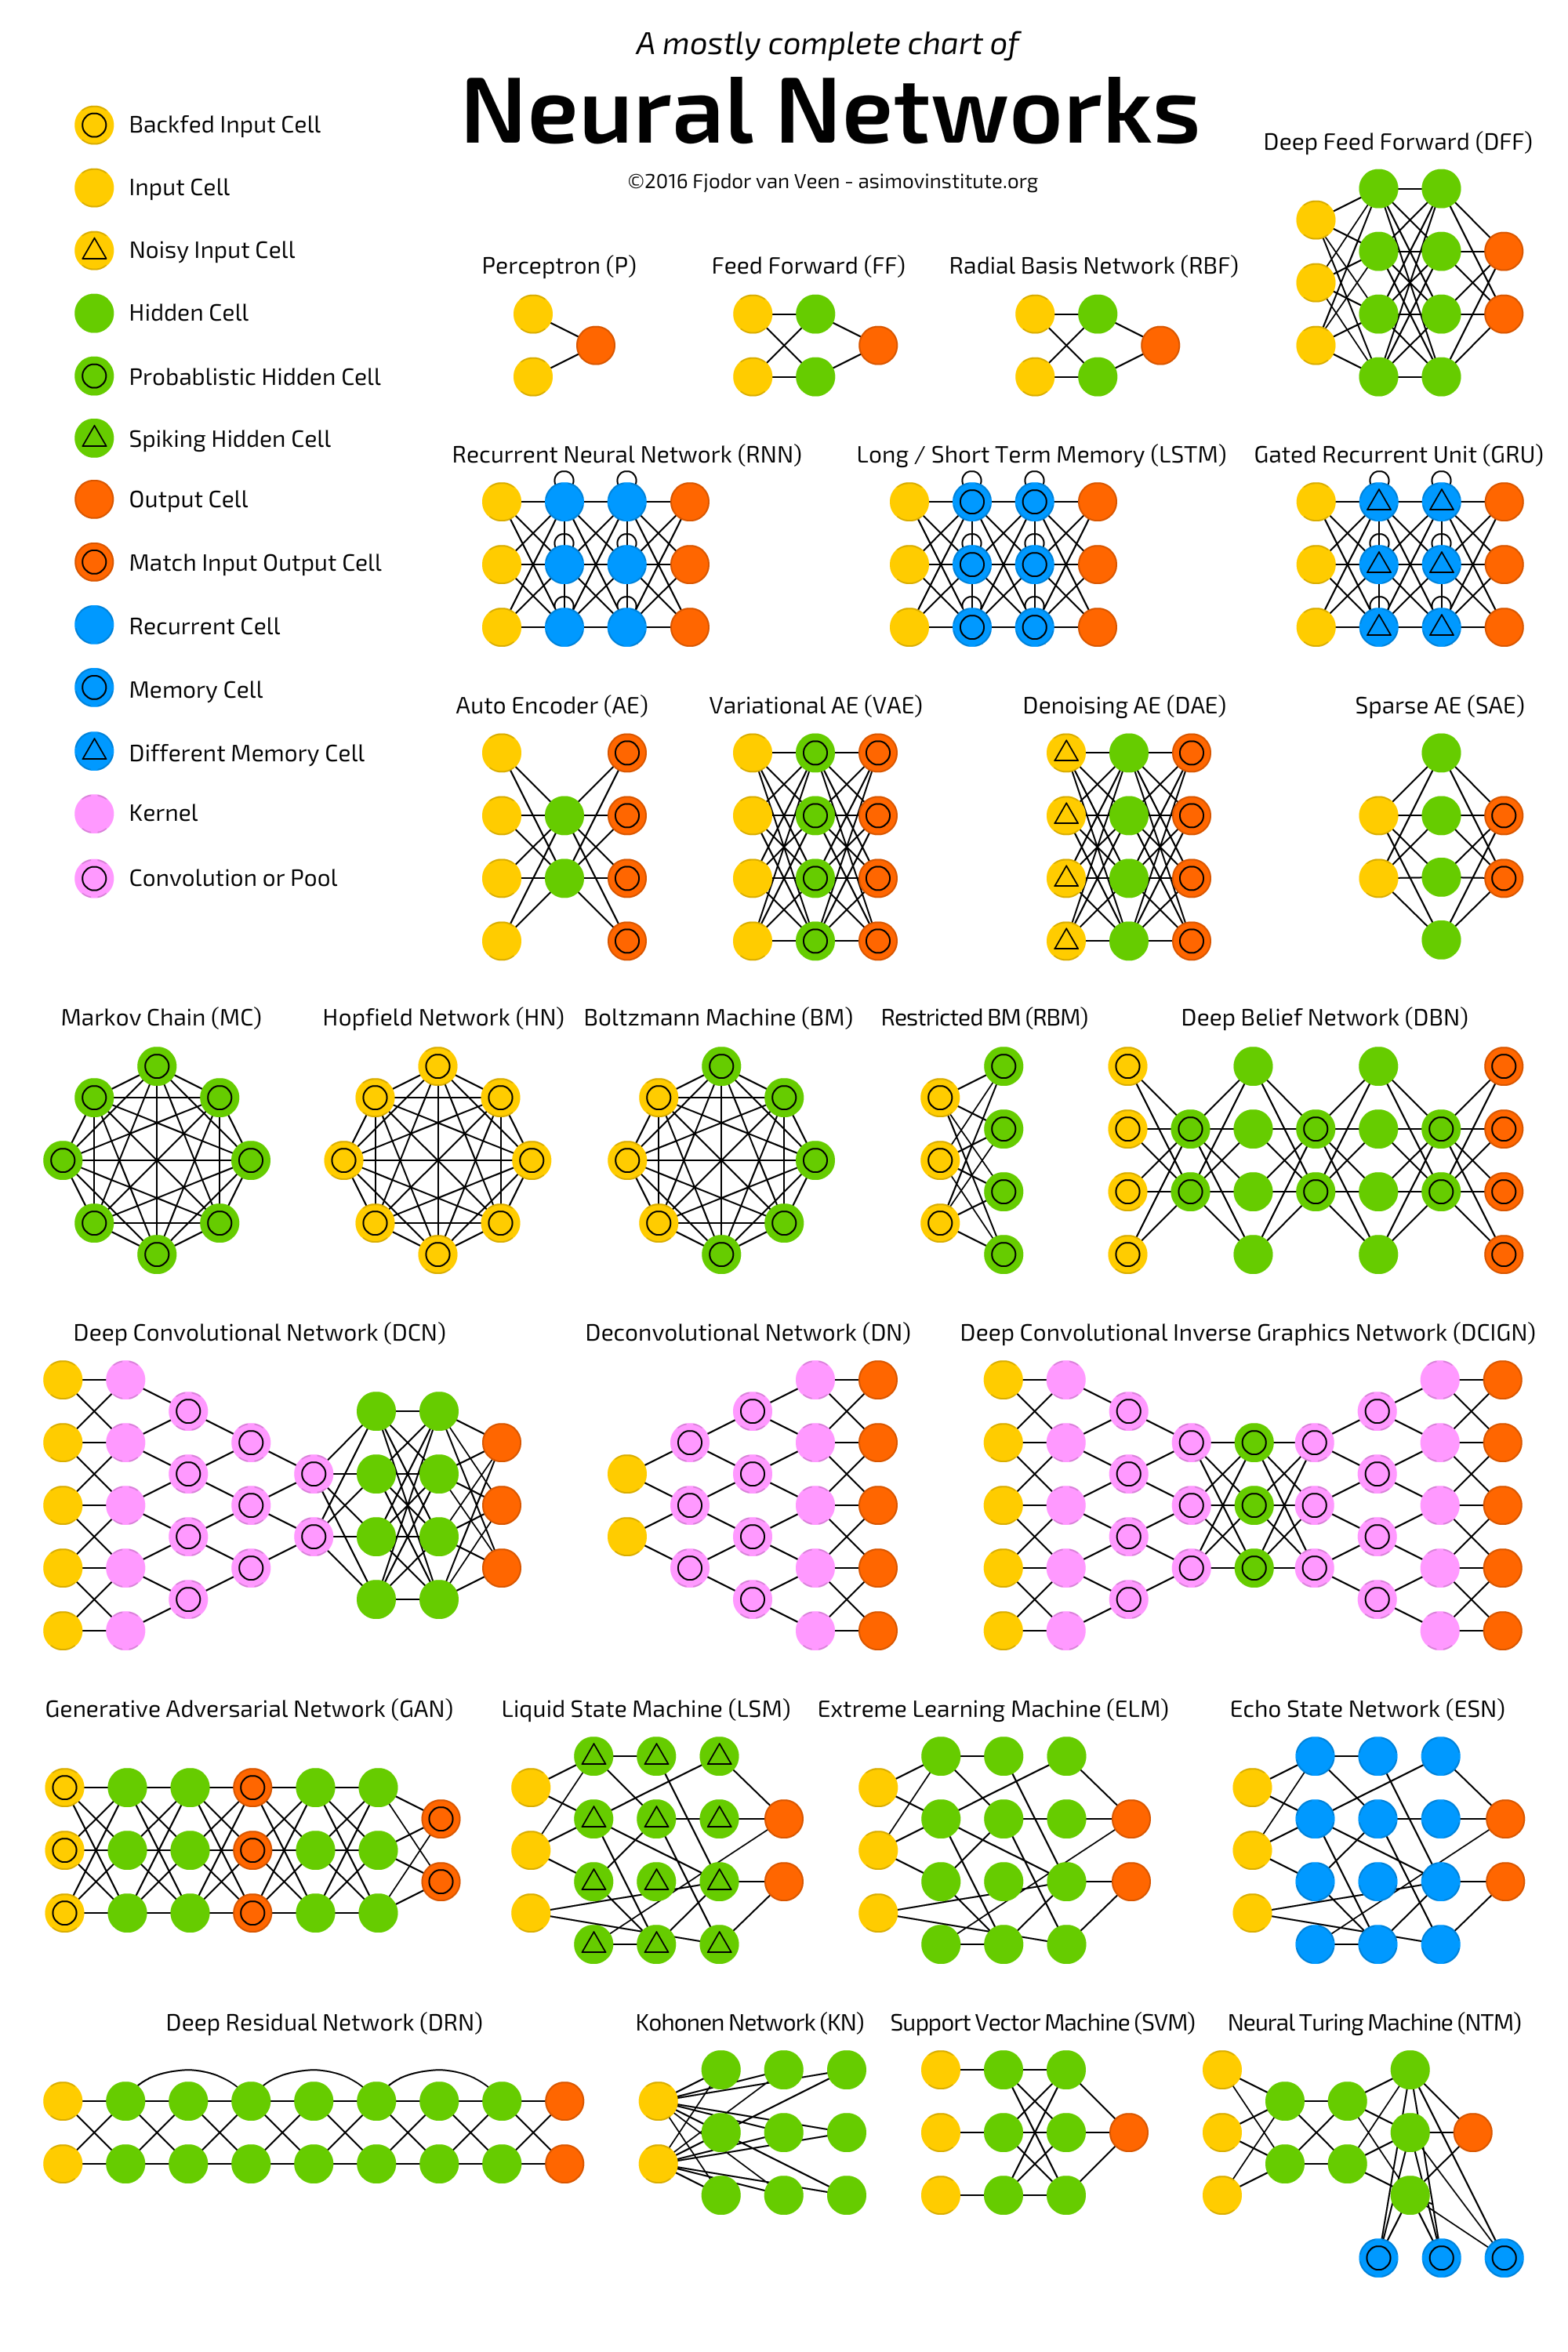

In [15]:
from IPython.display import Image
Image("neural_network_zoo.png")

At the heart of neural network models is the successive computation of functions. This is known as a computational graph. A computational graph uses nodes to describe variables and edges to describe how variables are combined.

Data sets where neural networks excel contain the same non-linearity, so we can generalize the learnings to real data sets as well.

`Scikit-learn` contains the following convenience functions for generating data:

 - `sklearn.datasets.make_regression()`
 - `sklearn.datasets.make_classification()`
 - `sklearn.datasets.make_moons()`

In [1]:
from sklearn.datasets import make_regression
import pandas as pd

# Generate regression data
data = make_regression(n_samples=100, n_features=3, random_state=1)

features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

In [3]:
# Fitting A Linear Regression Neural Network
import numpy as np
from sklearn.linear_model import SGDRegressor
features["bias"] = 1

def train(features, labels):
    lr = SGDRegressor()
    lr.fit(features, labels)
    weights = lr.coef_
    return weights
    
def feedforward(features, weights):
    predictions = np.dot(features, weights.T)
    return predictions

train_weights = train(features, labels)
linear_predictions = feedforward(features, train_weights)

## 

To generate a data set friendly for classification, we can use the make_classification() function from scikit-learn.

In [5]:
from sklearn.datasets import make_classification

# Generate Classification Data
class_data = make_classification(n_samples=100, n_features=4, random_state=1)
class_features = pd.DataFrame(class_data[0])
class_labels = pd.Series(class_data[1])

Implementing a Neural Network that performs classification

So far, we know that neural networks need:

 - a network structure (how are the nodes connected? which direction does the data and computation flow?)
 - a feedforward function (how are the node weights and observation values combined?)
 - an activation function (what transformations on the data are performed?)
 - a model fitting function (how is the model fit?)


In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification

class_data = make_classification(n_samples=100, n_features=4, random_state=1)
class_features = pd.DataFrame(class_data[0])
class_labels = pd.Series(class_data[1])

class_features["bias"] = 1

def log_train(class_features, class_labels):
    sg = SGDClassifier()
    sg.fit(class_features, class_labels)
    return sg.coef_

def sigmoid(linear_combination):
    return 1/(1+np.exp(-linear_combination))

def log_feedforward(class_features, log_train_weights):
    linear_combination = np.dot(class_features, log_train_weights.T)
    log_predictions = sigmoid(linear_combination)
    log_predictions[log_predictions >= 0.5] = 1
    log_predictions[log_predictions < 0.5] = 0
    return log_predictions

log_train_weights = log_train(class_features, class_labels)
log_predictions = log_feedforward(class_features, log_train_weights)

# Non-linear activation functions

The three most commonly used activation functions in neural networks are:

 - the sigmoid function
 - the ReLU function
 - the tanh function

[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.10526316 0.31578947
 0.52631579 0.73684211 0.94736842 1.15789474 1.36842105 1.57894737
 1.78947368 2.        ]


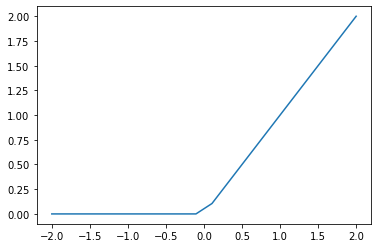

In [7]:
import matplotlib.pyplot as plt

import numpy as np
x = np.linspace(-2, 2, 20)

def relu(values):
    return np.maximum(values, 0)

relu_y = relu(x)

print(x)
print(relu_y)

plt.plot(x, relu_y)

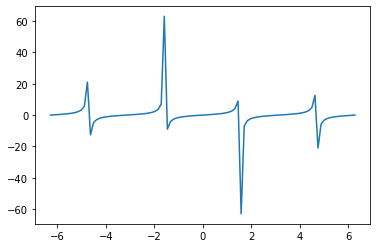

In [8]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
tan_y = np.tan(x)
plt.plot(x, tan_y)

general conclusion has been that period functions like tangent don't offer any unique benefits for modeling

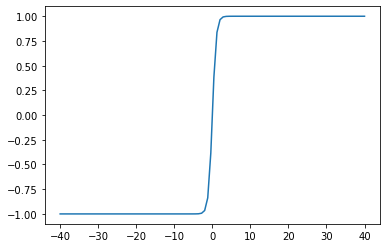

In [9]:
# Hyberbolic tangent

x = np.linspace(-40, 40, 100)
tanh_y = np.tanh(x)
plt.plot(x, tanh_y)

like the sigmoid function, the tanh function has horizontal asymptotes as 
 approaches negative or positive infinity. In addition, the tanh function also constrains the range (y) to between 
 and -1 and 1. 
 
 Because of this property, both the sigmoid and the tanh functions are commonly used in neural networks for classification tasks.

# Hidden Networks

Text(0.5, 0, 'y')

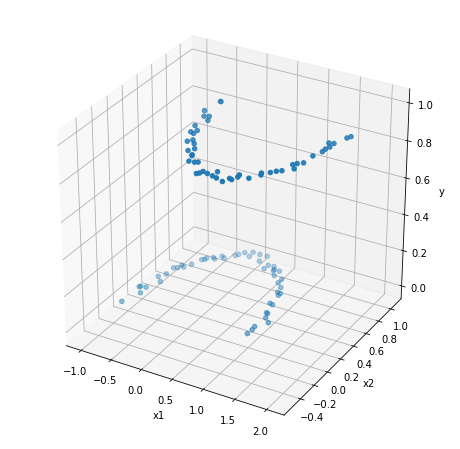

In [10]:
# Generating Data containing nonlinearity

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt

data = make_moons(100, random_state=3, noise=0.04)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(features[0], features[1], labels)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

## Training a neural network with scikit-learn

Scikit-learn contains two classes for working with neural networks:

 - MLPClassifier
 - MLPRegressor
 

While scikit-learn is friendly to use when learning new concepts, it has a few limitations when it comes to working with neural networks in production.

- At the time of writing, scikit-learn only supports using the same activation function for all layers.
- Scikit-learn also struggles to scale to larger datasets.
   - Libraries like Theano and TensorFlow support offloading some computation to the GPU to overcome bottlenecks.

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
np.random.seed(8)

data = make_moons(100, random_state=3, noise=0.04)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])
features["bias"] = 1

shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]
mlp = MLPClassifier(hidden_layer_sizes=(1,), activation='logistic')
mlp.fit(train_features, train_labels)
nn_predictions = mlp.predict(test_features)

lr = LogisticRegression()
lr.fit(train_features, train_labels)
log_predictions = lr.predict(test_features)

nn_accuracy = accuracy_score(test_labels, nn_predictions)
log_accuracy = accuracy_score(test_labels, log_predictions)

print("Logistic Regression Model Accuracy: ", log_accuracy)
print("Single Neuron Single Layer NN Model Accuracy: ", nn_accuracy)

Logistic Regression Model Accuracy:  0.88
Single Neuron Single Layer NN Model Accuracy:  0.48


The logistic regression model performed much better (accuracy of 88%) compared to the neural network model with one hidden layer and one neuron (48%). 

This network architecture doesn't give the model much ability to capture nonlinearity in the data unfortunately, which is why logistic regression performed much better.

In [14]:
# Hidden layers with multiple neurons

np.random.seed(8)
shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]
neurons = [1, 5, 10, 15, 20, 25]
accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic')
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(accuracy)
    
print(accuracies)

/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.48, 0.78, 0.86, 0.82, 0.84, 0.86]


/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [13]:
# Multiple hidden layers

neurons = [1, 5, 10, 15, 20, 25]
nn_accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n), activation='relu', max_iter=1000)
    
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    
    accuracy = accuracy_score(test_labels, nn_predictions)
    nn_accuracies.append(accuracy)

print(nn_accuracies)

/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.52, 0.88, 1.0, 1.0, 1.0, 1.0]
